In [1]:
import pandas as pd
import numpy as np

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Optionally, set the display width to ensure that pandas does not wrap text
pd.set_option('display.width', None)

# Set the column display length to maximum
pd.set_option('display.max_colwidth', None)

In [2]:
# data = pd.read_csv('mass_analyzer_Hybrid_LSTM_prediction_2_results_2.csv') #old garch_x data
data = pd.read_csv('mass_analyzer_Hybrid_LSTM_prediction_results.csv') #new garch_x data

models = ["NN_Social_Media_scores", "NN_scores", "GARCH_scores", "GARCH_X_scores"]

data = data.dropna()
data.head(5)

,Ticker,NN_Social_Media_MSE,NN_Social_Media_RMSPE,NN_Social_Media_MAE,NN_Social_Media_LOG_MSE,NN_Social_Media_LOG_RMSPE,NN_Social_Media_LOG_MAE,NN_Social_Media_Violation_Ratio,NN_Social_Media_Kupiec,NN_Social_Media_Christoffersen,NN_Social_Media_Joint,NN_Social_Media_QL,NN_Social_Media_FL,NN_Social_Media_SL,NN_MSE,NN_RMSPE,NN_MAE,NN_LOG_MSE,NN_LOG_RMSPE,NN_LOG_MAE,NN_Violation_Ratio,NN_Kupiec,NN_Christoffersen,NN_Joint,NN_QL,NN_FL,NN_SL,GARCH_MSE,GARCH_RMSPE,GARCH_MAE,GARCH_LOG_MSE,GARCH_LOG_RMSPE,GARCH_LOG_MAE,GARCH_Violation_Ratio,GARCH_Kupiec,GARCH_Christoffersen,GARCH_Joint,GARCH_QL,GARCH_FL,GARCH_SL,GARCH_X_MSE,GARCH_X_RMSPE,GARCH_X_MAE,GARCH_X_LOG_MSE,GARCH_X_LOG_RMSPE,GARCH_X_LOG_MAE,GARCH_X_Violation_Ratio,GARCH_X_Kupiec,GARCH_X_Christoffersen,GARCH_X_Joint,GARCH_X_QL,GARCH_X_FL,GARCH_X_SL
0,MSFT UW Equity,0.000319,0.968027,0.016576,0.002742,104.537289,0.047949,0.895105,Fail to reject H0,Reject H0,Reject H0,0.022384,0.067507,-0.008354,0.000320,0.978083,0.016676,0.002264,93.155705,0.040912,1.062937,Fail to reject H0,Reject H0,Reject H0,0.026578,0.064555,-0.007753,0.000323,0.982090,0.016751,0.001897,57.091944,0.038625,0.111888,Reject H0,Reject H0,Reject H0,0.002797,0.039421,-0.008399,0.000325,0.977962,0.016743,0.001935,63.901589,0.039396,0.951049,Fail to reject H0,Reject H0,Reject H0,0.023787,0.060209,-0.008084
1,AAPL UW Equity,0.000255,0.966116,0.014621,0.002637,inf,0.047289,0.335664,Reject H0,Fail to reject H0,Reject H0,0.008393,0.054680,-0.008728,0.000260,0.980749,0.014800,0.001743,inf,0.036784,0.503497,Reject H0,Reject H0,Reject H0,0.012589,0.048186,-0.008170,0.000261,0.982173,0.014818,0.001656,inf,0.036178,0.223776,Reject H0,Reject H0,Reject H0,0.005594,0.040918,-0.008406,0.000261,0.970064,0.014725,0.002142,inf,0.041814,0.895105,Fail to reject H0,Reject H0,Reject H0,0.022379,0.062602,-0.008349
2,NVDA UW Equity,0.001029,0.935141,0.029197,0.009770,inf,0.090979,0.168067,Reject H0,Fail to reject H0,Reject H0,0.004203,0.089144,-0.005632,0.001037,0.959438,0.029619,0.007784,inf,0.075246,0.896359,Fail to reject H0,Reject H0,Reject H0,0.022413,0.090763,-0.006050,0.001057,0.966026,0.029896,0.006580,inf,0.071063,0.000000,Fail to reject H0,Reject H0,Fail to reject H0,0.000000,0.065385,-0.007432,0.001067,0.958264,0.029839,0.006551,inf,0.072986,0.448179,Reject H0,Reject H0,Reject H0,0.011207,0.077601,-0.006969
3,AMZN UW Equity,0.000541,0.976067,0.021612,0.002977,inf,0.048925,0.783217,Fail to reject H0,Reject H0,Fail to reject H0,0.019585,0.065951,-0.008146,0.000538,0.977980,0.021599,0.003047,inf,0.047365,0.951049,Fail to reject H0,Reject H0,Fail to reject H0,0.023779,0.068631,-0.007700,0.000538,0.977510,0.021600,0.003058,inf,0.048983,0.223776,Reject H0,Reject H0,Reject H0,0.005594,0.052867,-0.008443,0.000543,0.970304,0.021552,0.003345,inf,0.051268,1.678322,Reject H0,Reject H0,Reject H0,0.041983,0.089252,-0.007401
4,GOOG UW Equity,0.000450,0.976801,0.019660,0.002490,34.008545,0.045015,1.006993,Fail to reject H0,Fail to reject H0,Fail to reject H0,0.019601,0.061421,-0.008006,0.000453,0.981066,0.019733,0.002540,33.975925,0.044239,1.062937,Fail to reject H0,Reject H0,Reject H0,0.025212,0.067481,-0.007607,0.000455,0.978688,0.019727,0.002501,31.164645,0.045578,0.335664,Reject H0,Reject H0,Reject H0,0.008394,0.051972,-0.008629,0.000460,0.976827,0.019758,0.002443,38.007066,0.045081,1.006993,Fail to reject H0,Reject H0,Reject H0,0.025211,0.066891,-0.007933


In [3]:
NN_Social_Media_scores = data.iloc[:, [*range(14)]]
NN_Social_Media_scores.columns = NN_Social_Media_scores.columns.str.replace('NN_Social_Media_', '')
NN_scores = data.iloc[:, [0,*range(14, 27)]]
NN_scores.columns = NN_scores.columns.str.replace('NN_', '')
GARCH_scores = data.iloc[:, [0,*range(27, 40)]]
GARCH_scores.columns = GARCH_scores.columns.str.replace('GARCH_', '')
GARCH_X_scores = data.iloc[:, [0,*range(40, 53)]]
GARCH_X_scores.columns = GARCH_X_scores.columns.str.replace('GARCH_X_', '')

model_scores = [NN_Social_Media_scores, NN_scores, GARCH_scores, GARCH_X_scores]

# exclude_cols = ['LOG_RMSPE', 'Kupiec', 'Christoffersen', 'DQ']

for df in model_scores:
    df.columns = df.columns.map(lambda col: col.lstrip('_'))
    for col in df.columns:
        df.loc[:, col] = pd.to_numeric(df[col], errors='ignore')

model_scores[-1].head(3)


/tmp/ipykernel_8113/317043341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipykernel_8113/317043341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipykernel_8113/317043341.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Ticker,MSE,RMSPE,MAE,LOG_MSE,LOG_RMSPE,LOG_MAE,Violation_Ratio,Kupiec,Christoffersen,Joint,QL,FL,SL
0,MSFT UW Equity,0.000325,0.977962,0.016743,0.001935,63.901589,0.039396,0.951049,Fail to reject H0,Reject H0,Reject H0,0.023787,0.060209,-0.008084
1,AAPL UW Equity,0.000261,0.970064,0.014725,0.002142,inf,0.041814,0.895105,Fail to reject H0,Reject H0,Reject H0,0.022379,0.062602,-0.008349
2,NVDA UW Equity,0.001067,0.958264,0.029839,0.006551,inf,0.072986,0.448179,Reject H0,Reject H0,Reject H0,0.011207,0.077601,-0.006969


In [4]:
#Correcting test results at 0 violation ratio
for df in model_scores:
    df.loc[df["Violation_Ratio"] == 0, ["Kupiec", "Christoffersen", "Joint"]] = "Reject H0"

In [5]:
model_scores[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           470 non-null    object 
 1   MSE              470 non-null    float64
 2   RMSPE            470 non-null    float64
 3   MAE              470 non-null    float64
 4   LOG_MSE          470 non-null    float64
 5   LOG_RMSPE        470 non-null    float64
 6   LOG_MAE          470 non-null    float64
 7   Violation_Ratio  470 non-null    float64
 8   Kupiec           470 non-null    object 
 9   Christoffersen   470 non-null    object 
 10  Joint            470 non-null    object 
 11  QL               470 non-null    float64
 12  FL               470 non-null    float64
 13  SL               470 non-null    float64
dtypes: float64(10), object(4)
memory usage: 51.5+ KB


In [6]:
results = []

# Iterate over each dataframe in the model_scores list
for id, df in enumerate(model_scores):
    avg_mse = df['MSE'].mean()
    avg_rmspe = df['RMSPE'].mean()
    avg_mae = df['MAE'].mean()
    avg_log_mae = df['LOG_MAE'].mean()
    avg_ql = df['QL'].mean()
    avg_fl = df['FL'].mean()
    avg_sl = df['SL'].mean()

    # Calculate the proportion of Violation_Ratio values above 1
    var_above_one = (df['Violation_Ratio'] > 1).sum() / df['Violation_Ratio'].count()

    fail_to_reject_Kupiec = df['Kupiec'].value_counts().get('Reject H0', 0)
    kupiec_score = fail_to_reject_Kupiec / df['Kupiec'].count() if df['Kupiec'].count() > 0 else 0
    
    fail_to_reject_Christoffersen = df['Christoffersen'].value_counts().get('Reject H0', 0)
    christoffersen_score = fail_to_reject_Christoffersen / df['Christoffersen'].count() if df['Christoffersen'].count() > 0 else 0
       
    fail_to_reject_Joint = df['Joint'].value_counts().get('Reject H0', 0)
    joint_score = fail_to_reject_Joint / df['Joint'].count() if df['Joint'].count() > 0 else 0
        
    # Append the results to the list as a dictionary
    results.append({
        "Model": models[id],
        'MSE': avg_mse,
        'RMSPE': avg_rmspe,
        'MAE': avg_mae,
        'LOG_MAE': avg_log_mae,
        'QL': avg_ql,
        'FL': avg_fl,
        'SL': avg_sl,
        'Violation_Ratio': var_above_one,
        'Kupiec': kupiec_score,
        'Christoffersen': christoffersen_score,
        'Joint': joint_score,
        
    })

# Create a result dataframe from the list of dictionaries
result_df = pd.DataFrame(results)
result_df = result_df.set_index(result_df.iloc[:, 0].values)
result_df = result_df.drop(columns='Model')
# print(result_df.iloc[:, 0].values)

result_df

,MSE,RMSPE,MAE,LOG_MAE,QL,FL,SL,Violation_Ratio,Kupiec,Christoffersen,Joint
NN_Social_Media_scores,0.000449,0.961755,0.018004,0.052982,0.018358,0.069186,-0.007578,0.202128,0.359574,0.463830,0.525532
NN_scores,0.000453,0.971215,0.018147,0.047039,0.027775,0.072275,-0.007413,0.451064,0.295745,0.663830,0.636170
GARCH_scores,0.000453,0.969433,0.018126,0.049362,0.009733,0.057360,-0.008134,0.063830,0.646809,0.904255,0.857447
GARCH_X_scores,0.000453,0.965793,0.018065,0.051563,0.013325,0.062875,-0.007889,0.123404,0.500000,0.838298,0.804255


In [7]:
#Drop the unused columns
result_df = result_df.drop(columns=['LOG_MAE','Violation_Ratio'])

## Heath map: Melyik Modellnek van a legjobb átlagos eredménye
#### Sötét zöld: Legjobb, sötét piros: legrosszabb
#### Oszloponként értelmezendő

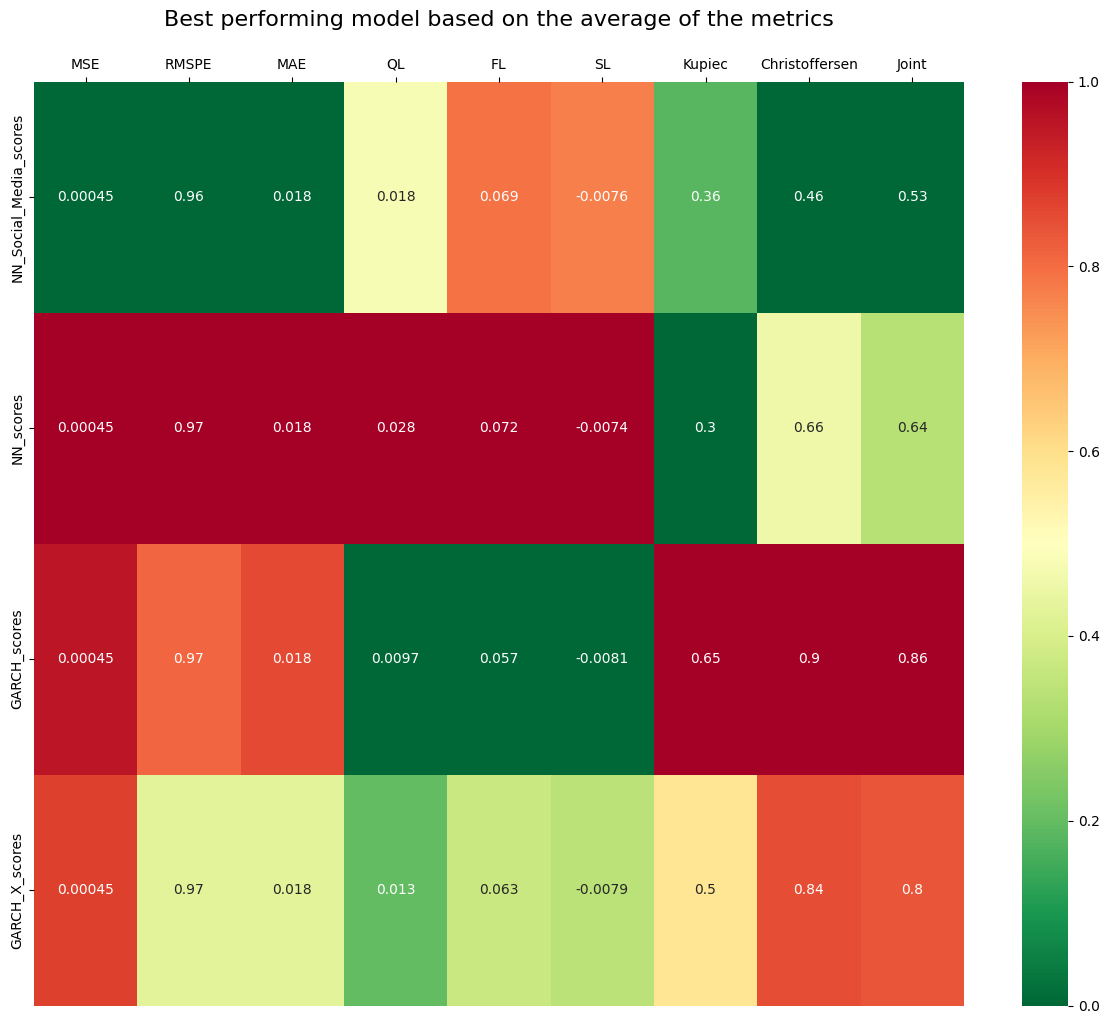

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize each column
results_normalized = result_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Create the heatmap with normalized data
plt.figure(figsize=(15, 12))
sns.heatmap(results_normalized.astype(float), annot=result_df, cmap='RdYlGn_r', cbar=True)  # 'RdYlGn_r' is reversed to get green for low values and red for high values
plt.title('Best performing model based on the average of the metrics', fontsize=16, pad=40)
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

plt.show()

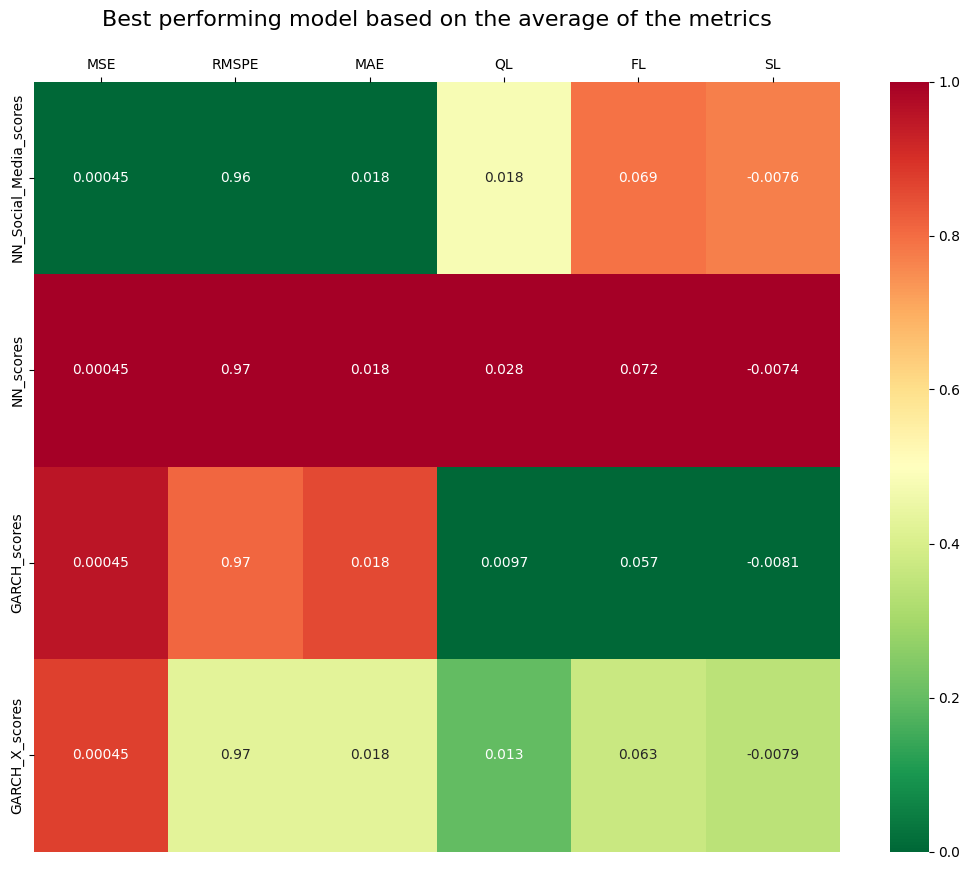

In [9]:
results_errors = result_df.drop(columns=['Kupiec', 'Christoffersen', 'Joint'])

# Normalize each column
results_normalized = results_errors.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Create the heatmap with normalized data
plt.figure(figsize=(13, 10))
sns.heatmap(results_normalized.astype(float), annot=results_errors, cmap='RdYlGn_r', cbar=True)  # 'RdYlGn_r' is reversed to get green for low values and red for high values
plt.title('Best performing model based on the average of the metrics', fontsize=16, pad=40)
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

plt.show()

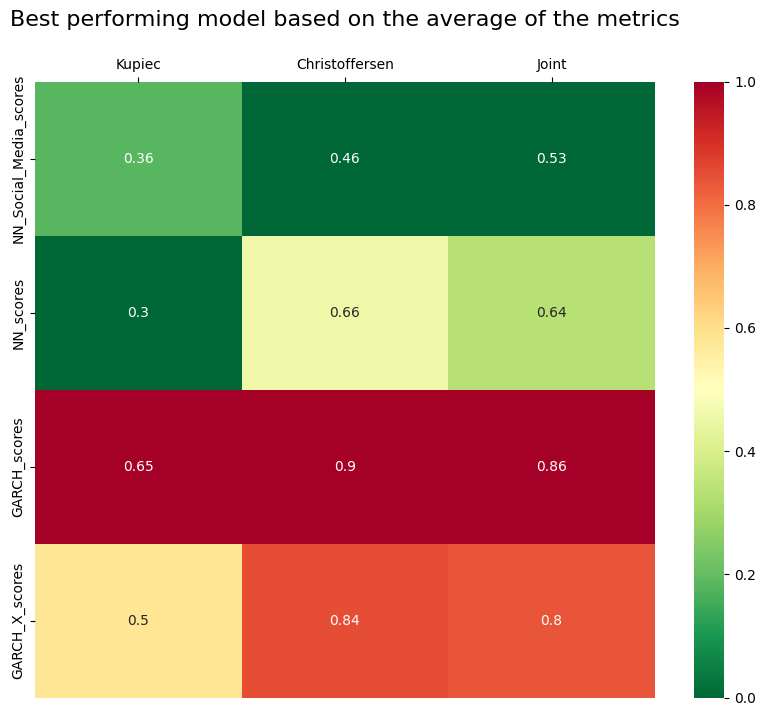

In [10]:
results_tests = result_df[['Kupiec', 'Christoffersen', 'Joint']]

# Normalize each column
results_normalized = results_tests.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Create the heatmap with normalized data
plt.figure(figsize=(10, 8))
sns.heatmap(results_normalized.astype(float), annot=results_tests, cmap='RdYlGn_r', cbar=True)  # 'RdYlGn_r' is reversed to get green for low values and red for high values
plt.title('Best performing model based on the average of the metrics', fontsize=16, pad=40)
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

plt.show()

## Melyik Modell érte el a legpontosabb átlagos eredményt

In [11]:
# Create a new DataFrame to store the indexes of the lowest values
winner_indexes = pd.DataFrame(columns=result_df.columns)

# Find the index of the row with the lowest value for each column
winner_indexes.loc[0] = result_df.idxmin()
winner_indexes

,MSE,RMSPE,MAE,QL,FL,SL,Kupiec,Christoffersen,Joint
0,NN_Social_Media_scores,NN_Social_Media_scores,NN_Social_Media_scores,GARCH_scores,GARCH_scores,GARCH_scores,NN_scores,NN_Social_Media_scores,NN_Social_Media_scores


## A részvények milyen arányánál volt az adott modell a legpontosabb

In [12]:
# Extract columns excluding 'Kupiec', 'Christoffersen', 'Joint'
metrics = result_df.columns.to_list()
metrics = [metric for metric in metrics if metric not in ['Kupiec', 'Christoffersen', 'Joint']]
# print(metrics)


# Initialize a DataFrame to store the number_of_wins_result
number_of_wins_result = pd.DataFrame(index=models, columns=metrics, data=0)

# Iterate over each metric
for metric in metrics:
    # Create an array to keep track of the model with the lowest value for each stock
    min_model_counts = np.zeros(len(models))
    
    # Iterate over each stock
    for stock_idx in range(model_scores[0].shape[0]):
        min_value = np.inf
        min_model = -1
        
        # Find the model with the lowest value for this stock and metric
        for model_idx, df in enumerate(model_scores):
            if df.iloc[stock_idx][metric] < min_value:
                min_value = df.iloc[stock_idx][metric]
                min_model = model_idx
        
        # Increment the count for the model with the lowest value
        min_model_counts[min_model] += 1
    
    # Calculate the proportion of stocks where each model had the lowest value
    number_of_wins_result[metric] = min_model_counts / model_scores[0].shape[0]

# number_of_wins_result.columns = result_df.columns[:-2]
number_of_wins_result


,MSE,RMSPE,MAE,QL,FL,SL
NN_Social_Media_scores,0.468085,0.455319,0.468085,0.146809,0.117021,0.176596
NN_scores,0.140426,0.085106,0.100000,0.021277,0.065957,0.042553
GARCH_scores,0.157447,0.140426,0.136170,0.659574,0.663830,0.602128
GARCH_X_scores,0.234043,0.319149,0.295745,0.172340,0.153191,0.178723


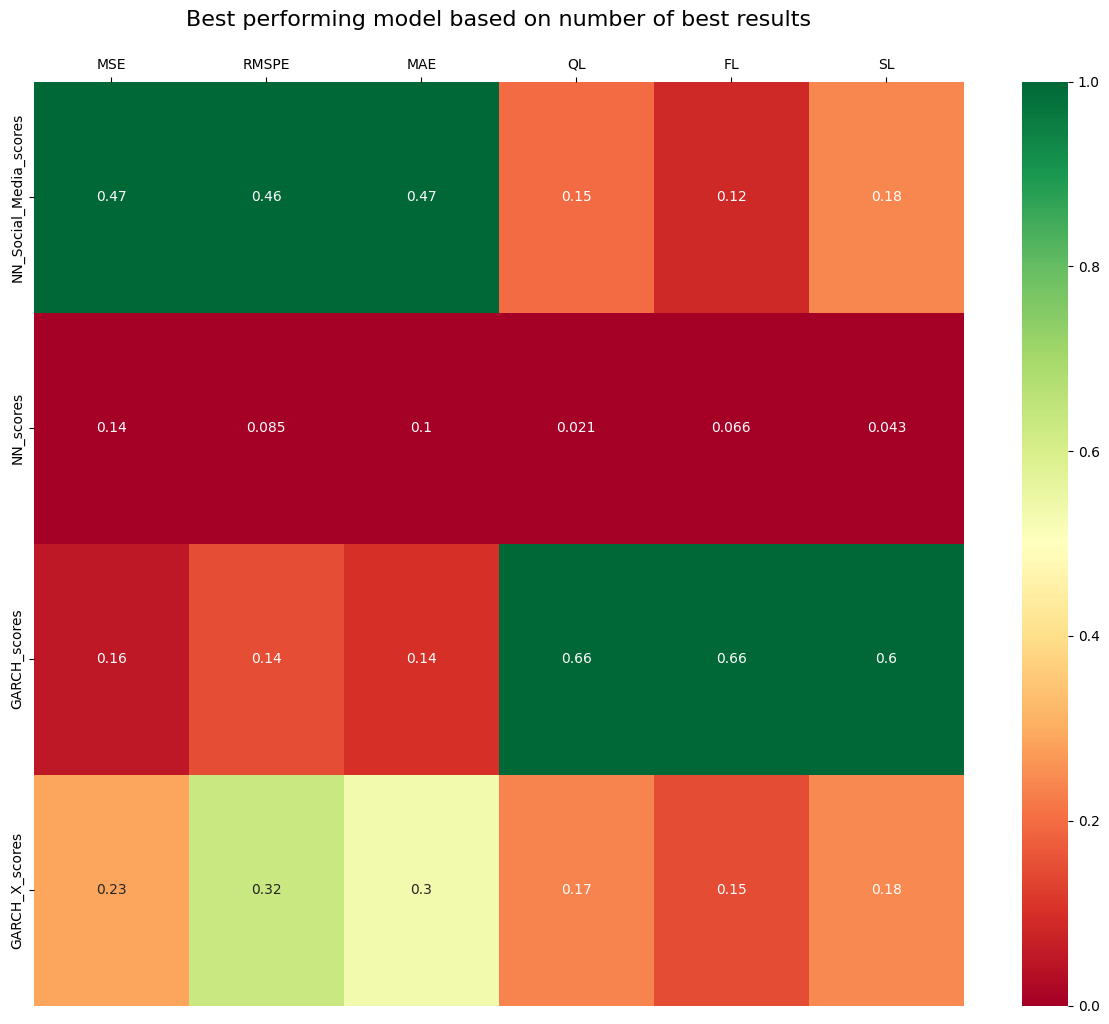

In [13]:
# Normalize each column
results_normalized = number_of_wins_result.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Create the heatmap with normalized data
plt.figure(figsize=(15, 12))
sns.heatmap(results_normalized.astype(float), annot=number_of_wins_result, cmap='RdYlGn', cbar=True)  # 'RdYlGn_r' is reversed to get green for low values and red for high values
plt.title('Best performing model based on number of best results', fontsize=16, pad=40)
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)

plt.show()

## Melyik Modell volt a legtöbb esetben a legpontosabb

In [14]:
# Create a new DataFrame to store the indexes of the lowest values
winner_indexes = pd.DataFrame(columns=number_of_wins_result.columns)

# Find the index of the row with the lowest value for each column
winner_indexes.loc[0] = number_of_wins_result.idxmax()
winner_indexes

,MSE,RMSPE,MAE,QL,FL,SL
0,NN_Social_Media_scores,NN_Social_Media_scores,NN_Social_Media_scores,GARCH_scores,GARCH_scores,GARCH_scores


## A 3 vizsgált hiba metrika közül hány esetben volt legalább 2-szer az adott modell a legpontosabb?

In [15]:
def evaluate_best_models(model_scores, models, error_metrics):
    # Initialize a list to store the best model for each row
    best_models = []

    # Determine the best model for each row
    for row_idx in range(len(model_scores[0])):
        # Extract the metrics for the current row from each model
        row_data = []
        for id, df in enumerate(model_scores):
            row_metrics = {'Model': models[id]}
            for metric in error_metrics:
                row_metrics[metric] = df.iloc[row_idx][metric]
            row_data.append(row_metrics)
        
        # Convert row data to a DataFrame
        row_df = pd.DataFrame(row_data)
        
        # Determine the best model based on the given metrics for the current row
        best_model_count = {model: 0 for model in models}
        for metric in error_metrics:
            best_model = row_df.loc[row_df[metric].idxmin()]['Model']
            best_model_count[best_model] += 1
        
        best_model = "No_clear_winner"
        for model, count in best_model_count.items():
            if count >= 2:
                best_model = model
                break
        
        best_models.append(best_model)

    # Create a Series object for the best models
    best_model_series = pd.Series(best_models, name="Best_model_error")

    # Calculate the win count and win percentage
    win_counts = best_model_series.value_counts()
    total_values = len(best_model_series)
    win_percentage = round((win_counts / total_values) * 100,2)

    # Create the result DataFrame
    result_df = pd.DataFrame({
        "Model": win_counts.index,
        "Win_count": win_counts.values,
        "Win_%": win_percentage.values
    })

    # result_df = result_df.set_index("Model")

    return result_df

In [16]:
error_metrics = ['MSE', 'RMSPE', 'MAE']
result = evaluate_best_models(model_scores, models, error_metrics)
print("Best model based on the MSE, RMSPE, MAE metrics")
display(result)

error_metrics = ['QL', 'SL', 'FL']
result = evaluate_best_models(model_scores, models, error_metrics)
print("Best model based on the QL, SL, FL metrics")
display(result)

Best model based on the MSE, RMSPE, MAE metrics


,Model,Win_count,Win_%
0,NN_Social_Media_scores,218,46.38
1,GARCH_X_scores,137,29.15
2,GARCH_scores,63,13.40
3,NN_scores,47,10.00
4,No_clear_winner,5,1.06


Best model based on the QL, SL, FL metrics


,Model,Win_count,Win_%
0,GARCH_scores,323,68.72
1,NN_Social_Media_scores,55,11.70
2,GARCH_X_scores,51,10.85
3,No_clear_winner,29,6.17
4,NN_scores,12,2.55


In [17]:
def plot_relative_performance(input_df, reference_model, metrics):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get unique models from the dataframe, excluding the reference model
    models = input_df.index.unique()
    models = [model for model in models if model != reference_model]
    
    # Reference scores for the reference_model
    reference_scores = input_df.loc[reference_model, metrics]
    
    # Bar width
    bar_width = 0.2
    
    # Initialize a list to keep track of all relative scores for y-axis limits
    all_relative_scores = []
    
    # Create bars for each metric
    for i, metric in enumerate(metrics):
        relative_scores = [((input_df.loc[model, metric] - reference_scores[metric]) / reference_scores[metric]) * 100 for model in models]
        all_relative_scores.extend(relative_scores)  # Collect all scores for y-axis limits
        x = np.arange(len(models)) + (i * bar_width)
        ax.bar(x, relative_scores, width=bar_width, label=metric)
    
    # Calculate y-axis limits
    min_score = min(all_relative_scores)
    max_score = max(all_relative_scores)
    #y_min = min_score - 0.2 * abs(min_score)
    #y_max = max_score + 0.2 * abs(max_score)
    y_min = np.floor(min_score * 2) / 2
    y_max = np.ceil(max_score * 2) / 2
    
    # Set the x-ticks and labels
    ax.set_xticks(np.arange(len(models)) + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.set_xlabel('Models')
    ax.set_ylabel('% Change from Reference Model')
    ax.set_ylim(bottom=y_min, top=y_max)  # Set the y-axis limits
    ax.legend()
    
    plt.title('Model Performance Comparison Relative to Reference Model')
    plt.show()


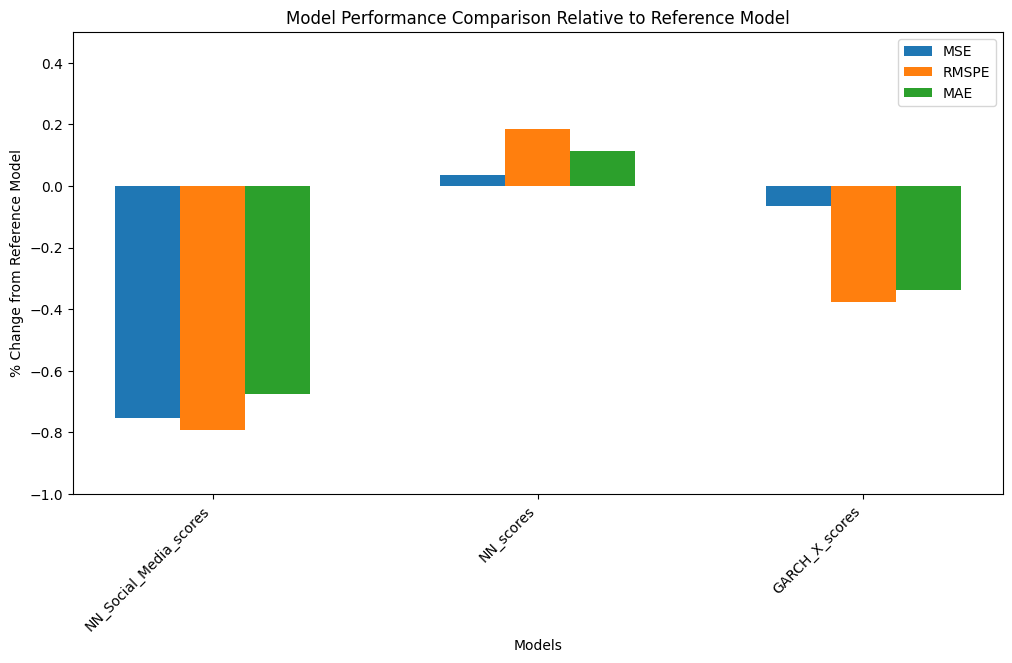

In [18]:
# Desired metrics
metrics = ['MSE', 'RMSPE', 'MAE']

# Reference model
reference_model = 'GARCH_scores'

# Plot the relative performance
#plot_relative_performance(number_of_wins_result, reference_model, metrics, increase=True)
plot_relative_performance(result_df, reference_model, metrics)

In [19]:
def calculate_comparison_matrix(models, model_scores, metrics):
    # Initialize a DataFrame to store the comparison results
    comparison_result = pd.DataFrame(index=pd.MultiIndex.from_product([models, metrics]), columns=models)

    # Iterate over each model as the base model
    for base_idx, base_model in enumerate(models):
        # Iterate over each metric
        for metric in metrics:
            # Iterate over each comparison model
            for comp_idx, comp_model in enumerate(models):
                if base_idx != comp_idx:
                    count_base_better = 0
                    # Iterate over each stock
                    for stock_idx in range(model_scores[0].shape[0]):
                        # Get the value of the base model and comparison model for the current stock and metric
                        base_value = model_scores[base_idx].iloc[stock_idx][metric]
                        comp_value = model_scores[comp_idx].iloc[stock_idx][metric]
                        # Check if the base model's value is better (lower)
                        if base_value < comp_value:
                            count_base_better += 1
                    
                    # Calculate the proportion of stocks where the base model outperformed the comparison model
                    proportion_better = count_base_better / model_scores[0].shape[0]
                    # Store the result in the DataFrame
                    comparison_result.at[(base_model, metric), comp_model] = proportion_better

    # Fill diagonal elements with NaN as they are not comparable
    for model in models:
        for metric in metrics:
            comparison_result.at[(model, metric), model] = np.nan

    #Drop the NaN values
    comparison_result = comparison_result.replace(np.NaN, "")
    # Return the comparison matrix
    return comparison_result

In [20]:
metrics = ["MSE", "RMSPE", "MAE"]
display(calculate_comparison_matrix(models, model_scores, metrics))

NN_Social_Media_scores NN_scores GARCH_scores  \
NN_Social_Media_scores MSE                           0.695745     0.631915   
                       RMSPE                         0.793617     0.661702   
                       MAE                            0.76383     0.655319   
NN_scores              MSE                 0.304255               0.497872   
                       RMSPE               0.206383               0.376596   
                       MAE                  0.23617               0.440426   
GARCH_scores           MSE                 0.368085  0.502128                
                       RMSPE               0.338298  0.623404                
                       MAE                 0.344681  0.559574                
GARCH_X_scores         MSE                 0.376596  0.568085     0.619149   
                       RMSPE               0.455319  0.776596     0.759574   
                       MAE                 0.431915  0.721277     0.731915   

                             GARCH_X_scores  
NN_Social_Media_scores MSE         0.623404  
                       RMSPE       0.544681  
                       MAE         0.568085  
NN_scores              MSE         0.431915  
                       RMSPE       0.223404  
                       MAE         0.278723  
GARCH_scores           MSE         0.380851  
                       RMSPE       0.240426  
                       MAE         0.268085  
GARCH_X_scores         MSE                   
                       RMSPE                 
                       MAE

Példa magyarázat az NN_Social_Media_scores - NN_scores hasonlításra:

In the result table, the value 0.695745 at the intersection of NN_Social_Media_scores (row) and NN_scores (column) for MSE means that in approximately 69.57% of the cases (stocks), the NN_Social_Media_scores model had a lower (better) MSE compared to the NN_scores model. This indicates that NN_Social_Media_scores outperformed NN_scores in terms of MSE for about 69.57% of the stocks evaluated.

In [21]:
metrics = ["QL", "FL", "SL"]
display(calculate_comparison_matrix(models, model_scores, metrics))

NN_Social_Media_scores NN_scores GARCH_scores  \
NN_Social_Media_scores QL                         0.882979     0.159574   
                       FL                              0.6     0.178723   
                       SL                         0.685106     0.238298   
NN_scores              QL               0.108511               0.074468   
                       FL                    0.4               0.140426   
                       SL               0.314894               0.119149   
GARCH_scores           QL                    0.8  0.921277                
                       FL               0.821277  0.859574                
                       SL               0.761702  0.880851                
GARCH_X_scores         QL               0.631915  0.861702     0.221277   
                       FL               0.697872  0.738298     0.217021   
                       SL               0.642553  0.753191     0.261702   

                          GARCH_X_scores  
NN_Social_Media_scores QL       0.342553  
                       FL       0.302128  
                       SL       0.357447  
NN_scores              QL       0.131915  
                       FL       0.261702  
                       SL       0.246809  
GARCH_scores           QL       0.697872  
                       FL       0.782979  
                       SL       0.738298  
GARCH_X_scores         QL                 
                       FL                 
                       SL

In [22]:

def calculate_comparison_matrix_tests(models, model_scores, metrics):
    # Initialize a DataFrame to store the comparison results
    comparison_result = pd.DataFrame(index=pd.MultiIndex.from_product([models, metrics]), columns=models)

    # Iterate over each model as the base model
    for base_idx, base_model in enumerate(models):
        # Iterate over each metric
        for metric in metrics:
            # Iterate over each comparison model
            for comp_idx, comp_model in enumerate(models):
                if base_idx != comp_idx:
                    base_fail_to_reject_count = 0
                    comp_fail_to_reject_count = 0
                    total_stocks = model_scores[0].shape[0]
                    
                    # Iterate over each stock
                    for stock_idx in range(total_stocks):
                        # Get the value of the base model and comparison model for the current stock and metric
                        base_value = model_scores[base_idx].iloc[stock_idx][metric]
                        comp_value = model_scores[comp_idx].iloc[stock_idx][metric]
                        
                        # Decode "Fail to Reject H0" as 1 and "Reject H0" as 0
                        base_value_numeric = 1 if base_value == "Fail to reject H0" else 0
                        comp_value_numeric = 1 if comp_value == "Fail to reject H0" else 0
                        
                        # Count the number of times each model has "Fail to Reject H0"
                        base_fail_to_reject_count += base_value_numeric
                        comp_fail_to_reject_count += comp_value_numeric
                    # Calculate the difference in counts
                    difference = base_fail_to_reject_count - comp_fail_to_reject_count
                    # Calculate the proportion
                    proportion_better = difference / total_stocks
                    # Store the result in the DataFrame
                    comparison_result.at[(base_model, metric), comp_model] = proportion_better

    # Fill diagonal elements with NaN as they are not comparable
    for model in models:
        for metric in metrics:
            comparison_result.at[(model, metric), model] = np.nan

    # Replace NaN values with empty strings for better readability
    comparison_result = comparison_result.replace(np.NaN, "")
    # Return the comparison matrix
    return comparison_result

In [23]:
metrics = ['Kupiec', 'Christoffersen', 'Joint']
display(calculate_comparison_matrix_tests(models, model_scores, metrics))

NN_Social_Media_scores NN_scores  \
NN_Social_Media_scores Kupiec                                 -0.06383   
                       Christoffersen                              0.2   
                       Joint                                  0.110638   
NN_scores              Kupiec                        0.06383             
                       Christoffersen                   -0.2             
                       Joint                       -0.110638             
GARCH_scores           Kupiec                      -0.287234 -0.351064   
                       Christoffersen              -0.440426 -0.240426   
                       Joint                       -0.331915 -0.221277   
GARCH_X_scores         Kupiec                      -0.140426 -0.204255   
                       Christoffersen              -0.374468 -0.174468   
                       Joint                       -0.278723 -0.168085   

                                      GARCH_scores GARCH_X_scores  
NN_Social_Media_scores Kupiec             0.287234       0.140426  
                       Christoffersen     0.440426       0.374468  
                       Joint              0.331915       0.278723  
NN_scores              Kupiec             0.351064       0.204255  
                       Christoffersen     0.240426       0.174468  
                       Joint              0.221277       0.168085  
GARCH_scores           Kupiec                           -0.146809  
                       Christoffersen                   -0.065957  
                       Joint                            -0.053191  
GARCH_X_scores         Kupiec             0.146809                 
                       Christoffersen     0.065957                 
                       Joint              0.053191

Példa magyarázat az NN_Social_Media_scores - NN_scores hasonlításra:

In the result table, the value -0.06383 at the intersection of NN_Social_Media_scores (row) and NN_scores (column) for Kupiec means that in approximately -6.38% of the cases (stocks), the NN_Social_Media_scores model had more "Fail to Reject H0" outcomes compared to the NN_scores model. This negative value indicates that NN_scores outperformed NN_Social_Media_scores in terms of the Kupiec test, with NN_Social_Media_scores having a higher count of "Fail to Reject H0" outcomes for about 6.38% of the stocks evaluated.